Implement the CNN model for classifying CIFAR10 image dataset by dividing the    
model into following 4 stages:
    
a.Loading and preprocessing the image data

b.Defining the model's architecture

c.Training the model

d.Estimating the model's performance

In [12]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras import datasets
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [13]:
#grabbing the mnist dataset
((X_train, Y_train), (X_test, Y_test)) = datasets.cifar10.load_data()

In [14]:
X_train[0].shape

(32, 32, 3)

In [15]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [16]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [17]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [18]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [19]:
Y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [20]:
X_train[0].shape

(32, 32, 3)

In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [22]:
#model compilation

model.compile(optimizer='sgd',loss="categorical_crossentropy",metrics=['accuracy'])
h = model.fit(X_train,Y_train, epochs=10, validation_data=(X_test,Y_test),batch_size=128)

Epoch 1/10


2022-11-13 23:17:49.357174: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


390/391 [============================>.] - ETA: 0s - loss: 2.2388 - accuracy: 0.1648

2022-11-13 23:18:10.118031: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


391/391 [==============================] - 21s 53ms/step - loss: 2.2386 - accuracy: 0.1651 - val_loss: 2.1096 - val_accuracy: 0.2642
Epoch 2/10
391/391 [==============================] - 20s 50ms/step - loss: 2.0009 - accuracy: 0.2868 - val_loss: 2.0393 - val_accuracy: 0.2765
Epoch 3/10
391/391 [==============================] - 20s 50ms/step - loss: 1.8751 - accuracy: 0.3383 - val_loss: 1.8075 - val_accuracy: 0.3673
Epoch 4/10
391/391 [==============================] - 20s 52ms/step - loss: 1.7574 - accuracy: 0.3812 - val_loss: 1.6994 - val_accuracy: 0.4016
Epoch 5/10
391/391 [==============================] - 20s 50ms/step - loss: 1.6515 - accuracy: 0.4170 - val_loss: 1.5904 - val_accuracy: 0.4340
Epoch 6/10
391/391 [==============================] - 20s 51ms/step - loss: 1.5682 - accuracy: 0.4457 - val_loss: 1.6006 - val_accuracy: 0.4338
Epoch 7/10
391/391 [==============================] - 20s 51ms/step - loss: 1.5069 - accuracy: 0.4648 - val_loss: 1.5105 - val_accuracy: 0.4624
Epo

In [23]:
epochs=10

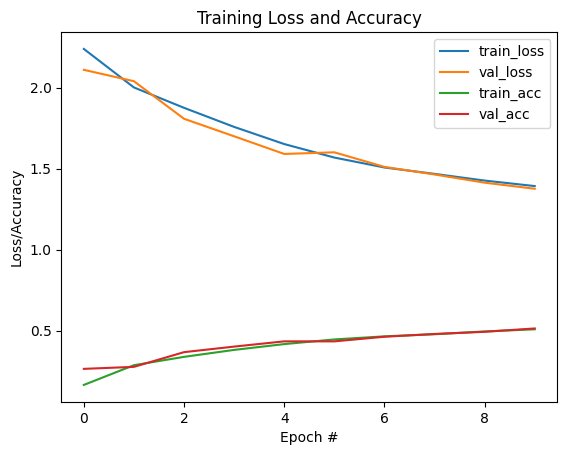

In [24]:
#plotting the training loss and accuracy
plt.figure()
plt.plot(np.arange(0, epochs), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), h.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), h.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()